<a href="https://colab.research.google.com/github/aaditya1004/CIFAR10/blob/master/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(len(x_test),28,28,1)
x_test = x_test.astype('float32')/255

In [0]:
import numpy as np
noise = 0.5
x_train_noisy = x_train + noise * np.random.normal(loc = 0.0,scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise * np.random.normal(loc = 0.0,scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



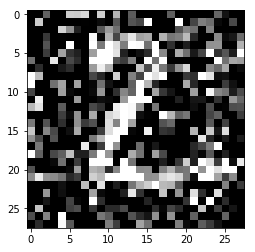

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test_noisy[1].reshape(28, 28))
plt.gray()
    


In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [7]:
input_image = Input(shape = (28,28,1))
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(input_image)
x = MaxPooling2D((2,2),padding = 'same')(x)
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(x)
encoded = MaxPooling2D((2,2),padding = 'same')(x)


W0709 05:38:58.587101 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 05:38:58.620478 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 05:38:58.630198 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 05:38:58.655838 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
from keras.models import Model
encoder = Model(input_image,encoded)

In [9]:
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),activation = 'sigmoid',padding = 'same')(x)
autoencoder = Model(input_image, decoded)

W0709 05:39:06.707512 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



In [10]:
autoencoder.compile(optimizer = 'adadelta',loss = 'binary_crossentropy',metrics = ['accuracy'])

W0709 05:39:09.541342 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 05:39:09.561394 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0709 05:39:09.566825 140163675514752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))
                
    
    

W0709 05:39:14.814918 140163675514752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.1744 - acc: 0.8051 - val_loss: 0.1193 - val_acc: 0.8077
Epoch 2/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1180 - acc: 0.8100 - val_loss: 0.1108 - val_acc: 0.8114
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1108 - acc: 0.8114 - val_loss: 0.1093 - val_acc: 0.8088
Epoch 4/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1073 - acc: 0.8119 - val_loss: 0.1041 - val_acc: 0.8105
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1051 - acc: 0.8123 - val_loss: 0.1021 - val_acc: 0.8111
Epoch 6/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1035 - acc: 0.8125 - val_loss: 0.1028 - val_acc: 0.8125
Epoch 7/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1026 - acc: 0.8127 - val_loss: 0.1007 

In [13]:
x_train_noisy.predict

AttributeError: ignored

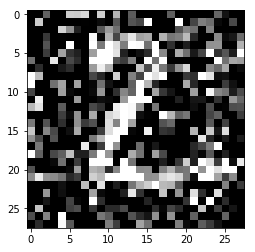

In [19]:
plt.imshow(x_test_noisy[1].reshape(28, 28))
plt.gray()

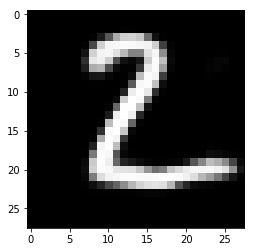

In [20]:
result = autoencoder.predict(x_test_noisy)
plt.imshow(result[1].reshape(28, 28))
plt.gray()